
Grover Algortism Implementation to Unsorted Database

Grover's algorithm, conceived by Lov Grover in 1996, has captivated researchers with its 
remarkable capability to expedite unstructured search exponentially compared to classical 
algorithms. By harnessing quantum parallelism and interference, Grover's algorithm offers 
a quadratic speedup, rendering it indispensable for endeavors such as database searching, 
optimization, and cryptography.

In this project, we delve into the implementation of Grover's algorithm utilizing Qiskit,
a quantum programming framework. Through this endeavor, we aim to explore the algorithm's 
principles and applications while demonstrating its efficacy in real-world scenarios.

Time Complexity O(sqrt(N))---N stands for the number of items in the list


In [40]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import sqrt, pi


In [41]:
# Define the unsorted list of numbers
numbers = [5, 8, 2, 10, 7, 4, 3, 1, 9, 6]

# Number to search for in the list
target_number = 7

# Determine the number of qubits required to represent the numbers
num_qubits = len(numbers).bit_length()

# Number of iterations for Grover's algorithm (approximately sqrt(N))
num_iterations = round(sqrt(len(numbers)))



In [42]:
# Create a quantum circuit
qc = QuantumCircuit(num_qubits)

# Apply Hadamard gates to all qubits
qc.h(range(num_qubits))

# Apply Oracle to mark the state corresponding to the target number
oracle = QuantumCircuit(num_qubits)
for index, number in enumerate(numbers):
    if number == target_number:
        binary_index = format(index, f'0{num_qubits}b')
        for qubit_index, bit in enumerate(binary_index):
            if bit == '1':
                oracle.x(qubit_index)
                
                
oracle.h(range(num_qubits))
oracle.z(range(num_qubits))
for index, number in enumerate(numbers):
    if number == target_number:
        binary_index = format(index, f'0{num_qubits}b')
        for qubit_index, bit in enumerate(binary_index):
            if bit == '1':
                oracle.x(qubit_index)
qc = qc.compose(oracle)



In [43]:

# Apply Grover diffusion operator
qc.h(range(num_qubits))
qc.z(range(num_qubits))
qc.cz(0, num_qubits - 1)
qc.h(range(num_qubits))

# Measure qubits
qc.measure_all()



Quantum Circuit:
        ┌───┐┌───┐┌───┐┌───┐┌───┐        ┌───┐      ░ ┌─┐         
   q_0: ┤ H ├┤ H ├┤ Z ├┤ H ├┤ Z ├──────■─┤ H ├──────░─┤M├─────────
        ├───┤├───┤├───┤├───┤├───┤┌───┐ │ ├───┤┌───┐ ░ └╥┘┌─┐      
   q_1: ┤ H ├┤ X ├┤ H ├┤ Z ├┤ X ├┤ H ├─┼─┤ Z ├┤ H ├─░──╫─┤M├──────
        ├───┤├───┤├───┤├───┤├───┤├───┤ │ └───┘└───┘ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├┤ H ├┤ Z ├┤ H ├┤ Z ├┤ H ├─┼────────────░──╫──╫─┤M├───
        ├───┤├───┤├───┤├───┤├───┤└───┘ │ ┌───┐      ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤ H ├┤ Z ├┤ H ├┤ Z ├──────■─┤ H ├──────░──╫──╫──╫─┤M├
        └───┘└───┘└───┘└───┘└───┘        └───┘      ░  ║  ║  ║ └╥┘
meas: 4/═══════════════════════════════════════════════╩══╩══╩══╩═
                                                       0  1  2  3 

Measurement Outcomes:


C:\Users\ABN\AppData\Local\Temp\ipykernel_15292\3191230269.py:9: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


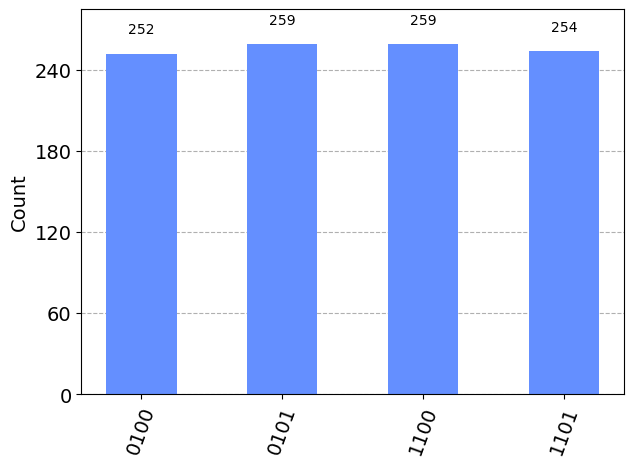

In [44]:
# Display quantum circuit
print("Quantum Circuit:")
print(qc.draw())

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, simulator)
qobj = assemble(transpiled_qc)
result = simulator.run(qobj).result()

# Plot measurement outcomes
counts = result.get_counts()
print("\nMeasurement Outcomes:")
plot_histogram(counts)

